In [11]:
#importing pandas module
import pandas as pd
yearly_data = pd.read_csv("/home/syedasamreen/syeda/yearly_deaths_by_clinic.csv")
yearly_data.count()

year      12
births    12
deaths    12
clinic    12
dtype: int64

In [4]:
#calculating the prorportion of deaths per no. of births.
yearly_data["prop_deaths"] = yearly_data["deaths"]/yearly_data["births"]
yearly_data.head()

,year,births,deaths,clinic,prop_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [9]:
#Extracting  clinic1 data into clinic1 and clinic2 data into clinic 2 rows
Clinic1 = yearly_data[yearly_data["clinic"] == "clinic 1"]
Clinic2 = yearly_data[yearly_data["clinic"] == "clinic 2"]



,year,births,deaths,clinic,prop_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


<AxesSubplot:xlabel='year', ylabel='Proportion deaths'>

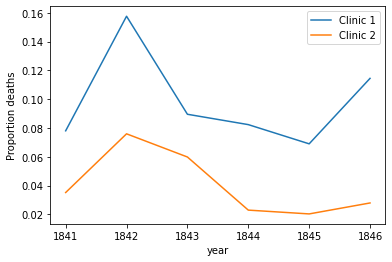

In [16]:
# Plot yearly proportion of deaths at the two clinics
%matplotlib inline
ax=Clinic1.plot(x="year", y="prop_deaths", label="Clinic 1")
Clinic2.plot(x="year", y="prop_deaths", label="Clinic 2", ax=ax, ylabel="Proportion deaths")

In [17]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("/home/syedasamreen/syeda/monthly_deaths.csv",parse_dates=["date"])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

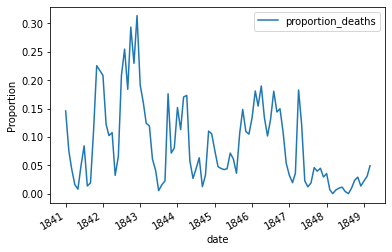

In [19]:
# Plot monthly proportion of deaths
ax = monthly.plot(x="date", y="proportion_deaths", ylabel="Proportion")

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

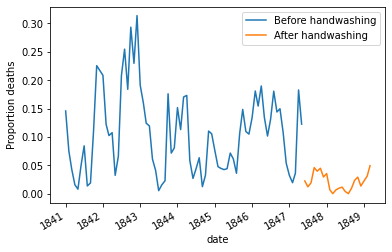

In [20]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing")
after_washing.plot(x="date", y="proportion_deaths",
                   label="After handwashing", ax=ax, ylabel="Proportion deaths")

In [21]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

In [22]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100941
0.975   -0.067652
dtype: float64

In [23]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True